In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Loading the dataset into DataFrame

In [2]:
df=pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


#DATA CLEANING

**Checking & correcting the datatype of each column in a dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

**checking and handling the missing/null values**

In [5]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**No missing/null values in a dataset**

**checking and handling with duplicates**

In [6]:
df.duplicated().sum() #The dataset has no duplicates

0

In [7]:
df.shape

(568630, 31)

In [8]:
df.drop('id', axis=1, inplace=True)  #removing the "id" column , from this dataset


In [9]:
df.shape

(568630, 30)

#EDA

**summary statistics**

In [10]:
df.shape

(568630, 30)

In [11]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,568630.000000,568630.000000,568630.000000,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.118237e-17,-1.023647e-16,1.023647e-16,0.000000,2.559118e-17,2.559118e-17,0.000000,0.000000,0.000000,1.023647e-16,...,1.279559e-17,1.599449e-18,6.397796e-18,-2.559118e-17,-3.838678e-17,0.000000,-2.559118e-17,3.838678e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,1.000001,1.000001,1.000001,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222,-9.952786e+00,-2.111111e+01,-4.351839,-10.756342,-3.751919,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-0.656020,-2.934955e-01,-4.458712e-01,-0.283533,-0.192257,-0.568745,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-0.631895,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-0.073762,8.108788e-02,7.871758e-02,0.233366,-0.114524,0.092526,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-0.011892,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,0.707005,4.397368e-01,4.977881e-01,0.525955,0.047299,0.559262,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,0.672888,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536,4.271689e+01,2.616840e+01,217.873038,5.958040,20.270062,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285,1.132311e+02,7.725594e+01,24039.930000,1.0


**we are dealing with binary classification,so**

In [12]:
df[df["Class"]==0].describe() #summary statistics for NOT Fraud data points/observations

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,0.673665,...,-0.109640,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506,0.0
std,0.823780,0.699694,0.703000,0.670814,0.659360,0.724878,0.680147,0.234341,0.737617,0.643480,...,0.283103,0.665628,0.628250,1.129375,0.840462,1.083032,0.510286,0.791552,6929.500715,0.0
min,-3.495584,-49.966572,-3.183760,-4.951222,-9.952786,-21.111108,-3.470512,-10.756342,-1.916317,-2.111207,...,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-8.226969,-10.498633,-39.035243,50.120000,0.0
25%,-0.137680,-0.659950,0.149456,-1.082322,0.014171,0.016251,0.261605,-0.199056,0.144401,0.393875,...,-0.196060,-0.523588,-0.185732,-0.602451,-0.589134,-0.781780,-0.317491,-0.228248,6034.540000,0.0
50%,0.212300,-0.422918,0.566170,-0.636818,0.232901,0.316757,0.447237,-0.147484,0.465011,0.560026,...,-0.115185,-0.036867,-0.035066,0.115801,-0.057297,-0.106251,-0.236418,-0.073035,11996.900000,0.0
75%,1.089764,-0.188602,1.105280,-0.314858,0.518734,0.698831,0.649758,-0.077200,0.889695,0.810706,...,-0.029475,0.460693,0.127059,0.933859,0.496666,0.542481,-0.132531,0.088282,18040.265000,0.0
max,2.229046,3.781692,14.125834,3.201536,42.716891,26.168402,217.873038,5.517577,20.270062,31.722709,...,6.834415,12.632511,31.707627,12.965639,14.621509,5.623285,113.231093,77.255937,24039.930000,0.0


In [13]:
df[df["Class"]==1].describe()#summary statistics for FRAUD data points/observations

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,-0.673665,...,0.109640,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763,1.0
std,0.899890,1.013186,0.758476,0.683137,1.155811,1.046878,1.027026,1.379656,0.877642,0.823583,...,1.376887,1.247617,1.266925,0.831062,1.134011,0.903854,1.283753,1.163028,6909.750891,0.0
min,-2.637662,-4.354871,-2.518308,-1.369576,-3.301638,-3.992872,-4.351839,-6.535574,-3.751919,-3.163276,...,-12.170779,-6.450353,-14.452018,-3.061862,-6.810179,-3.142725,-4.947034,-4.681207,50.010000,1.0
25%,-0.987457,-0.059755,-1.058440,0.223155,-0.895840,-1.055736,-0.998959,-0.171901,-1.128155,-1.099348,...,-0.056038,-0.458915,-0.313041,-0.690113,-0.506577,-0.520578,-0.247487,-0.255928,6074.640000,1.0
50%,-0.466978,0.315891,-0.642064,0.682550,-0.217567,-0.344515,-0.269964,-0.018501,-0.524025,-0.589278,...,0.123284,-0.017395,-0.090979,-0.118808,0.027397,0.057893,0.267966,0.241339,12062.450000,1.0
75%,0.020336,0.855481,-0.195426,1.216940,0.282330,0.204656,0.151652,0.259378,0.010938,-0.224024,...,0.358277,0.466587,0.215736,0.438727,0.606451,0.732728,0.745973,0.744542,18033.780000,1.0
max,1.874323,4.361865,2.193790,2.394164,9.240845,3.531564,3.849367,5.958040,3.325877,3.384513,...,8.087080,9.770936,6.557122,2.443924,3.838035,4.622883,4.834397,4.148860,24039.930000,1.0


**UNIVARIATE ANALAYSIS**

**checking disturbution for numerical columns using histplot**

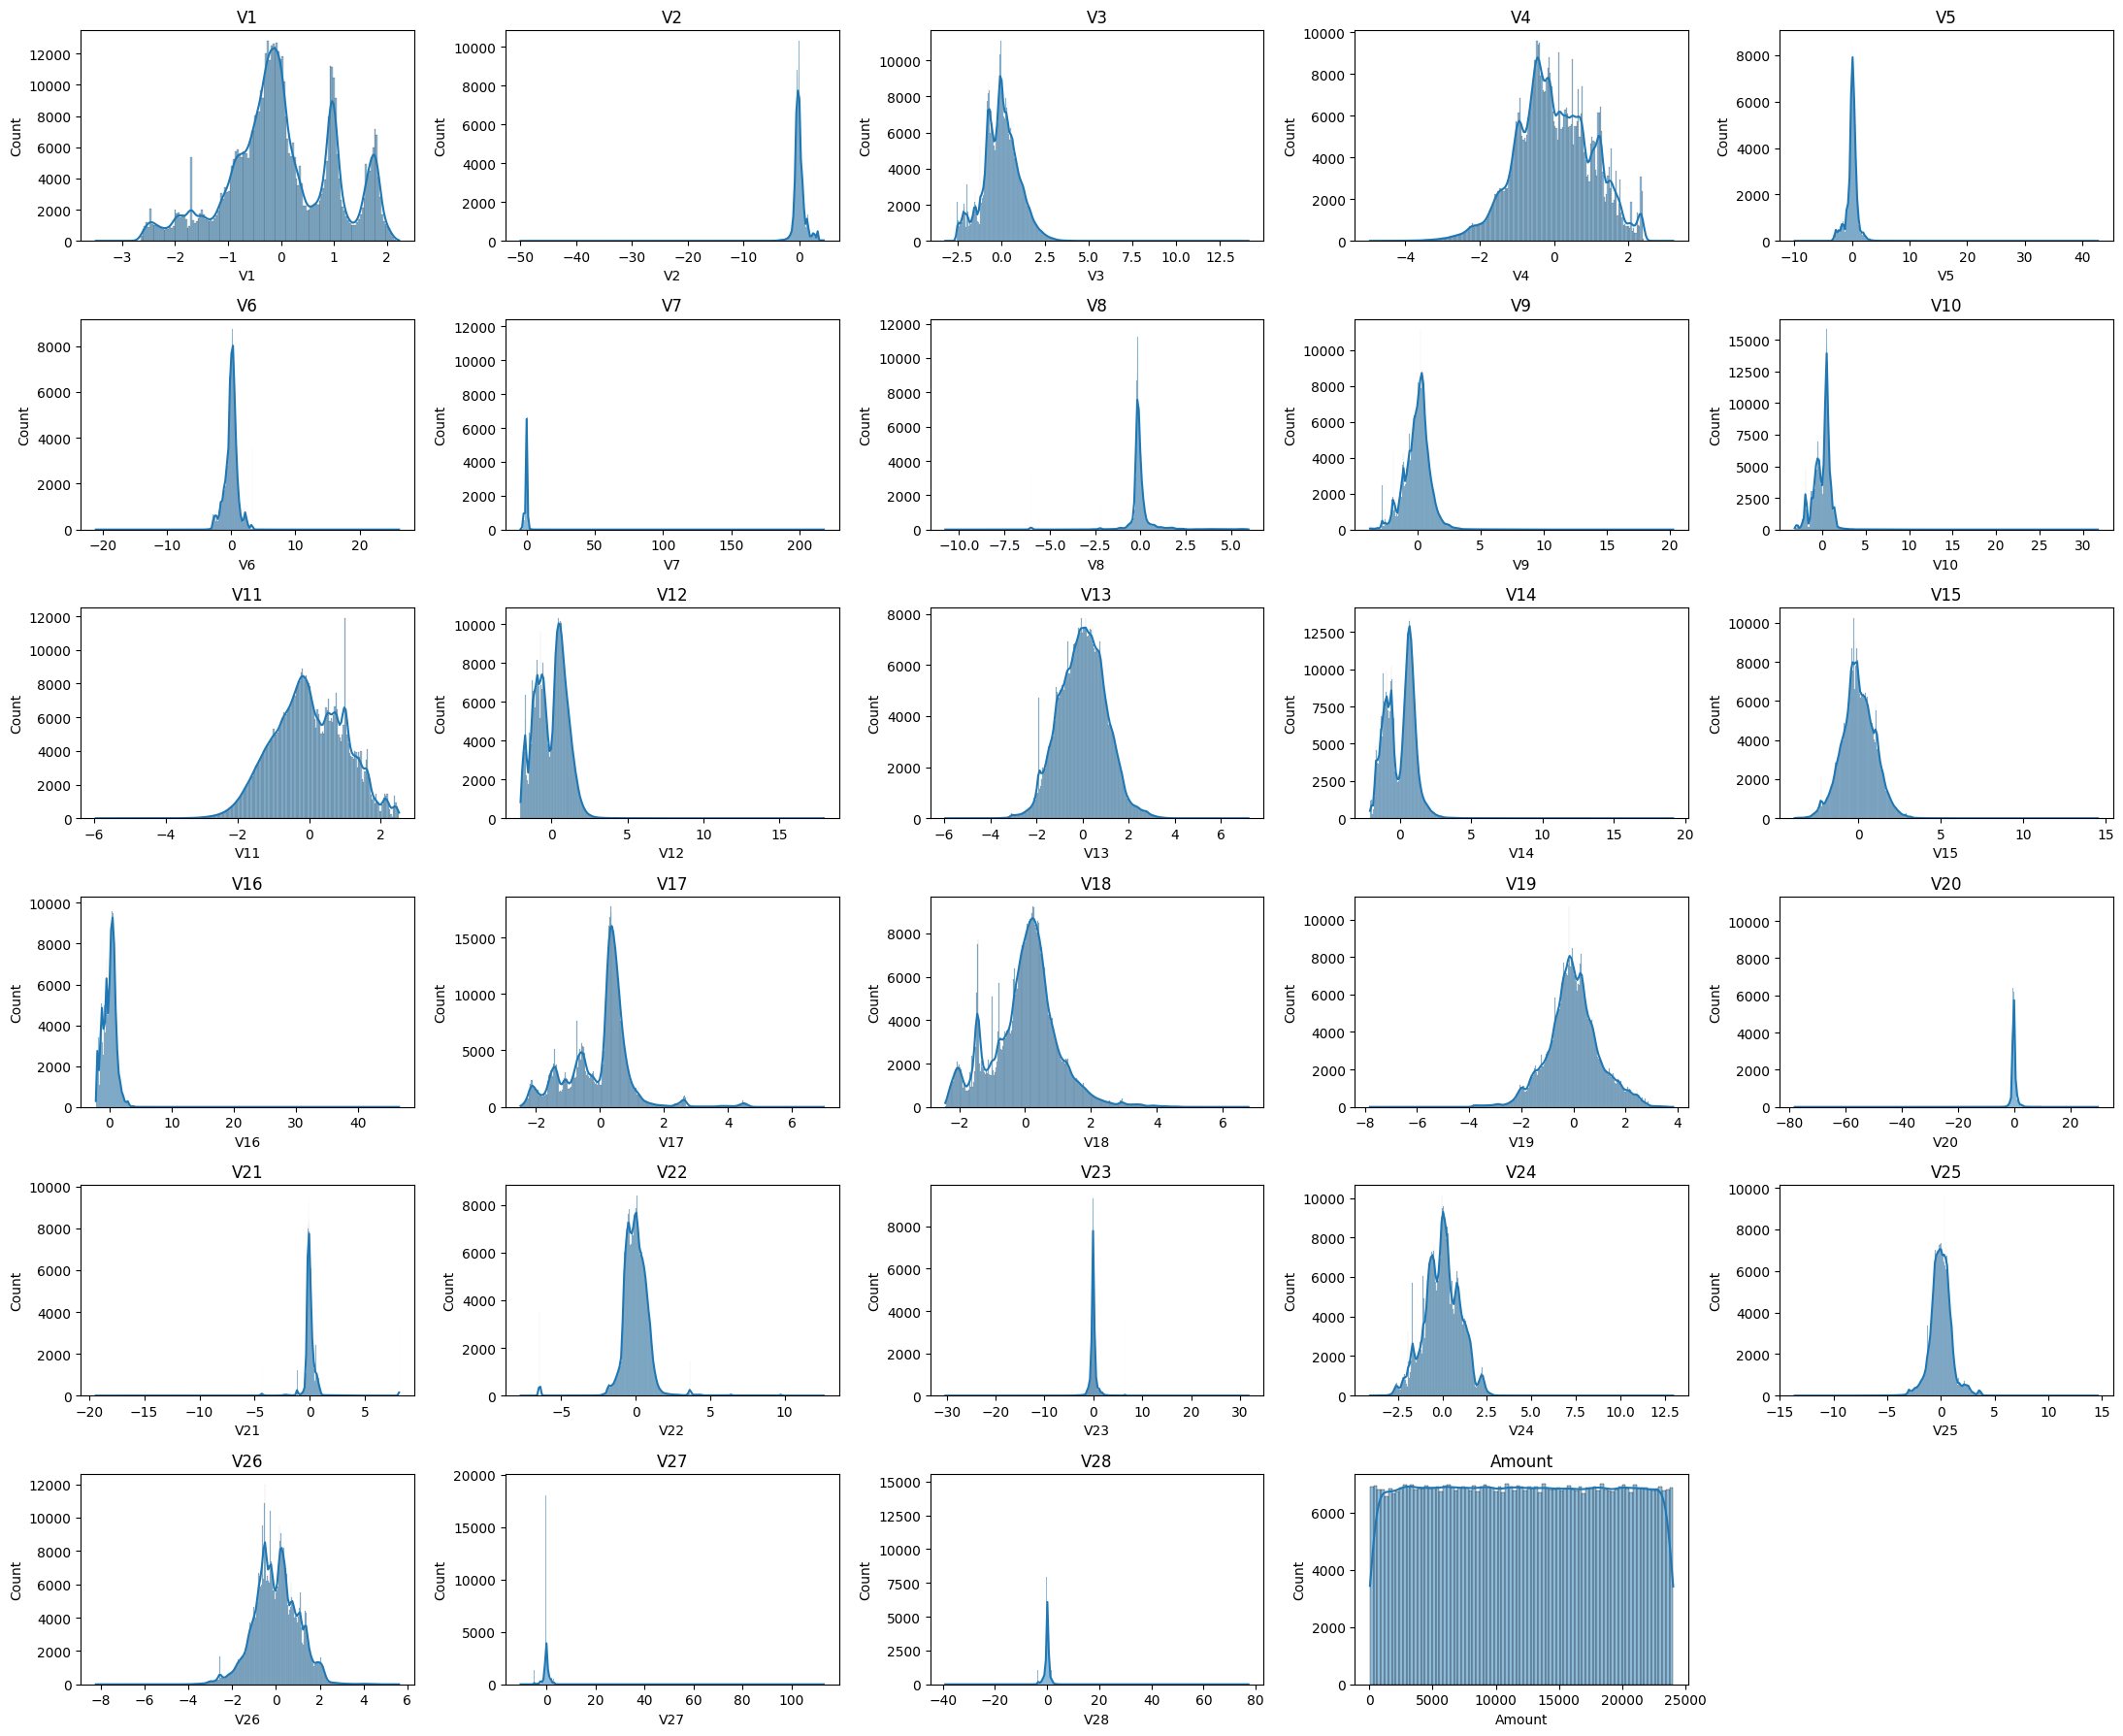

In [14]:
columns=df.columns.tolist()[:-1]
plt.figure(figsize=(22,18))
for i in range(len(columns)):
  plt.subplot(6,5,i+1)
  sns.histplot(df[columns[i]],kde=True)
  plt.title(columns[i])
plt.tight_layout()
plt.show()

**checking the disturbution for categorical columns using countplot**

In [15]:
df.Class.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

**From the above observation,we conculde that the data for both fraud and non-fraud is balanced**

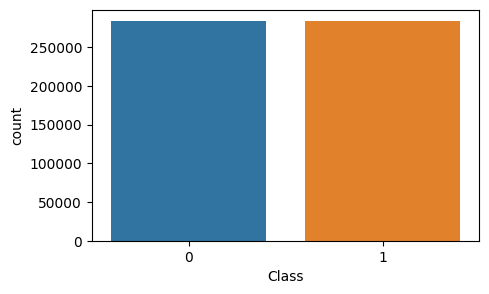

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(x="Class",data=df)
plt.show()

**BIVARIATE ANALAYSIS**

**checking relationship between numerical features and target(categorical)**








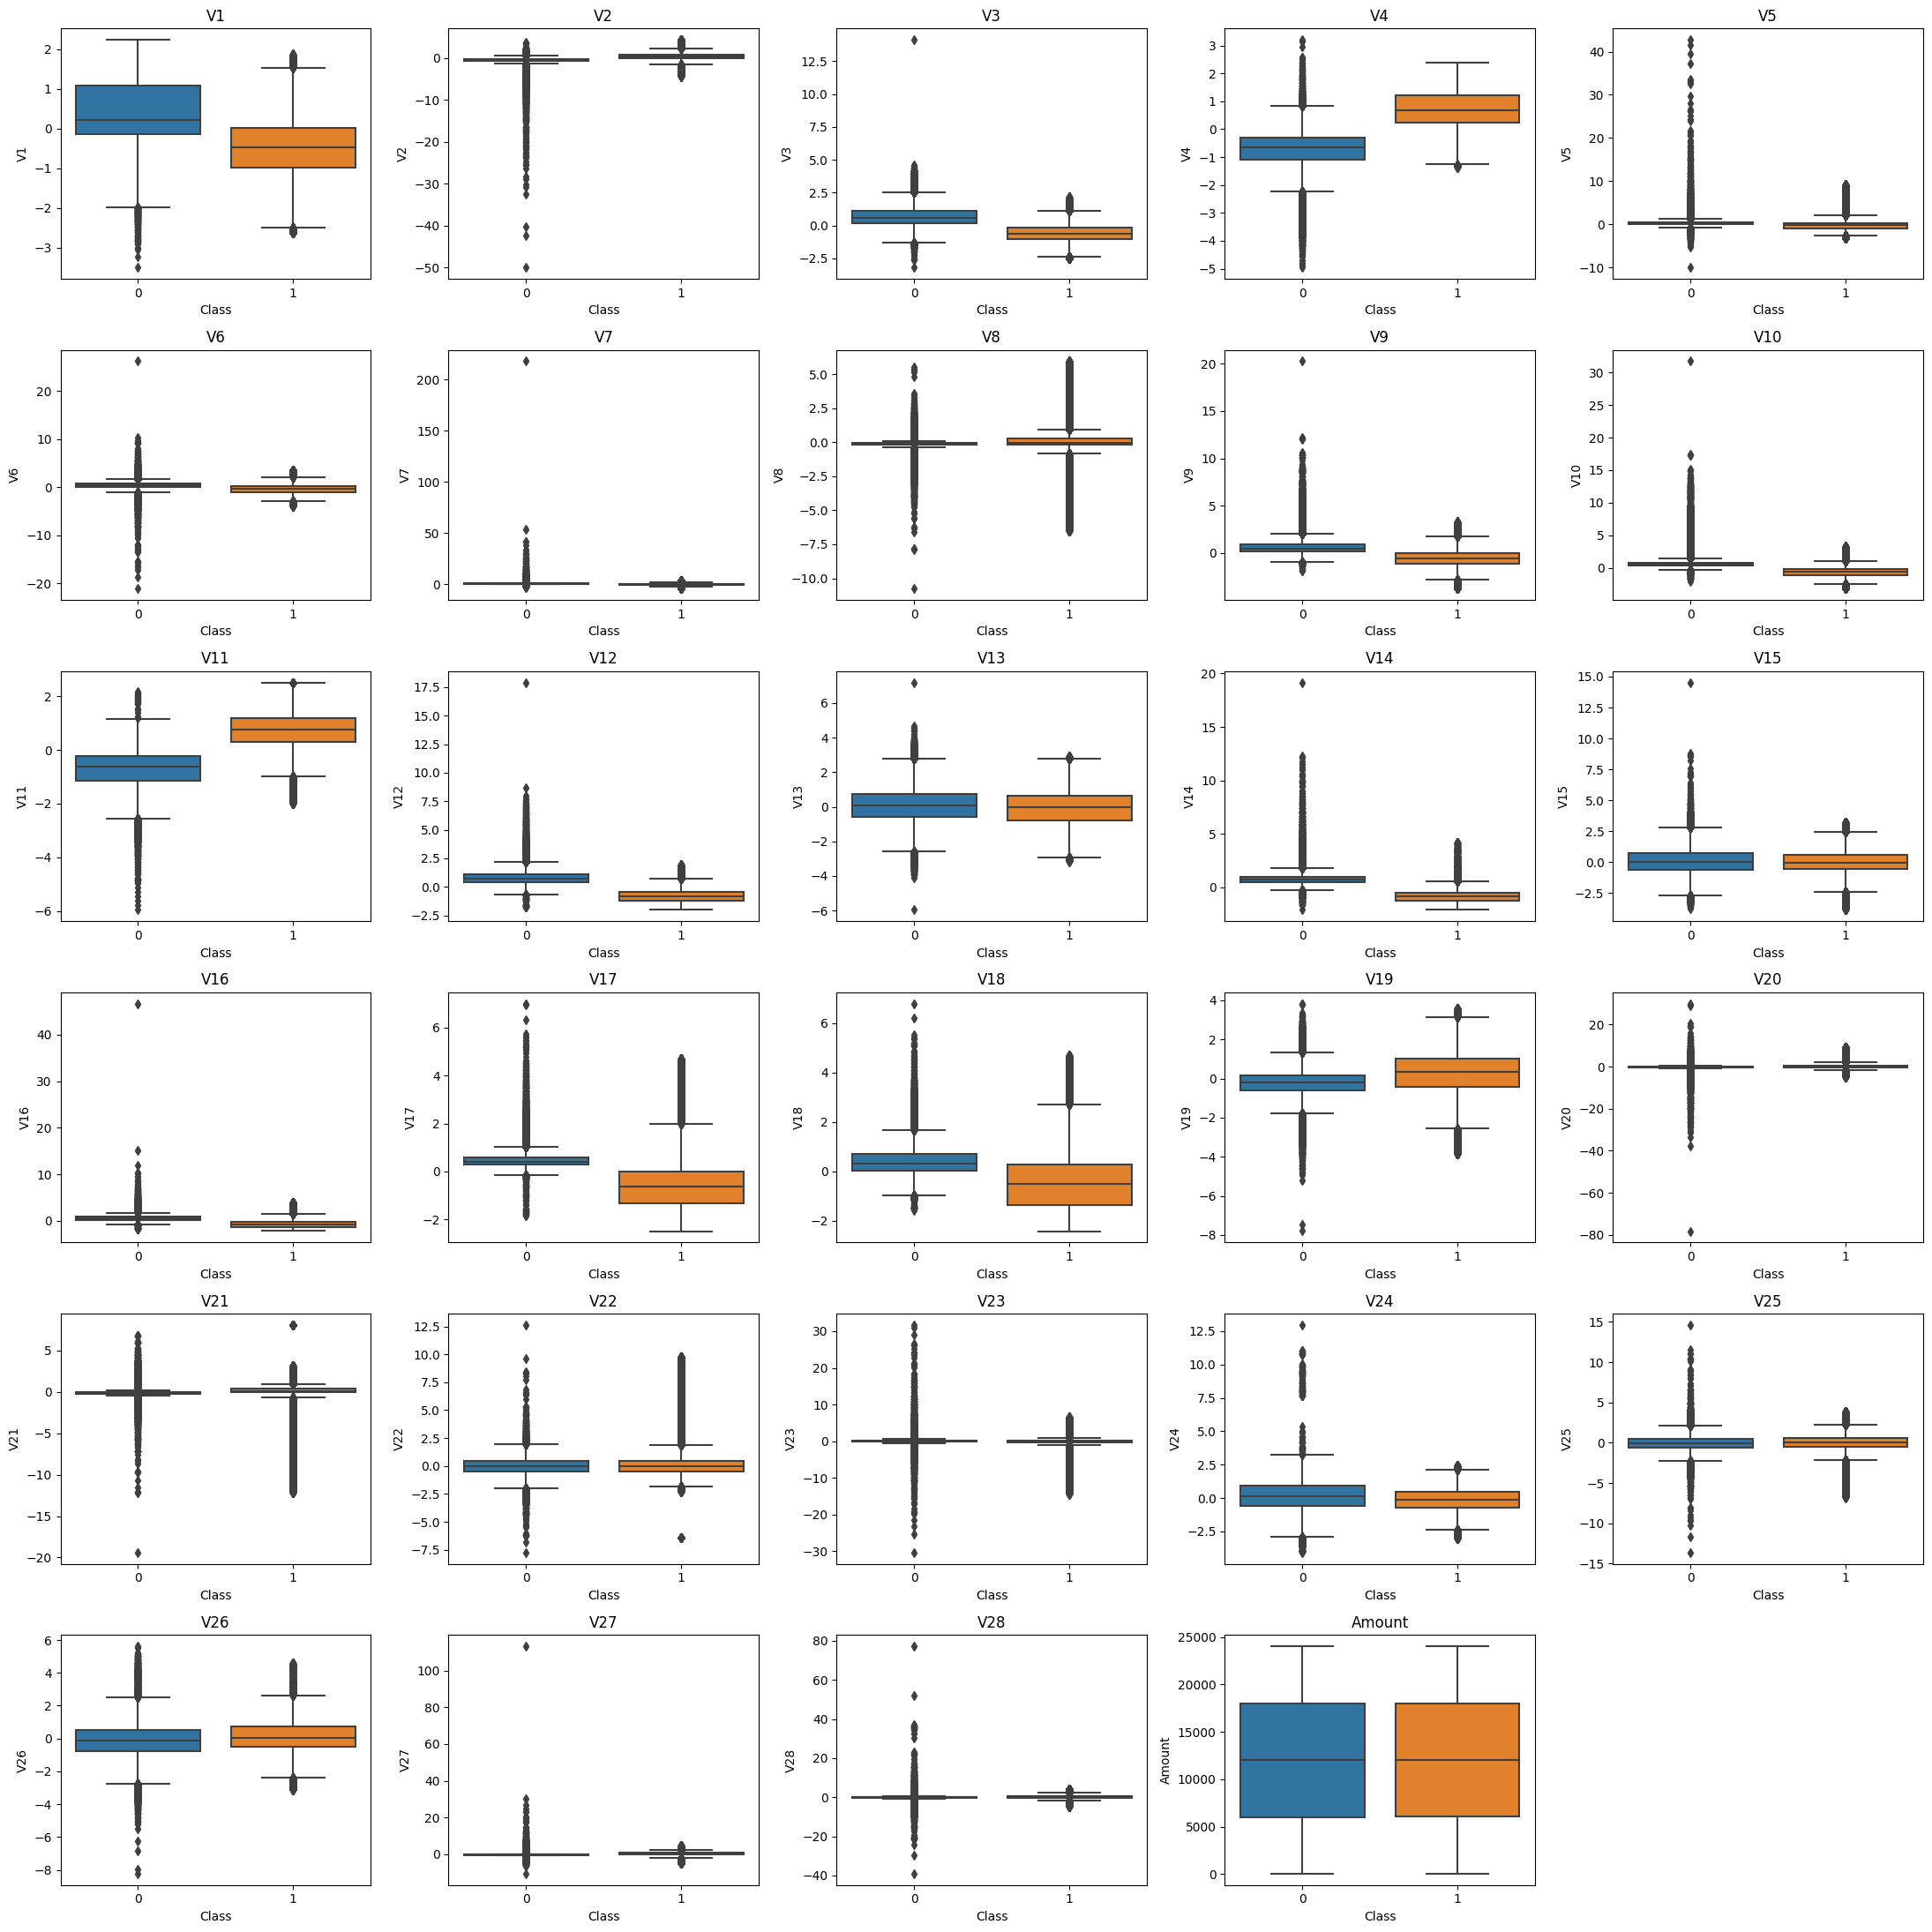

In [17]:
columns=df.columns.tolist()[:-1]
plt.figure(figsize=(22,22))
for i in range(len(columns)):
  plt.subplot(6,5,i+1)
  sns.boxplot(x="Class",y=columns[i],data=df)
  plt.title(columns[i])
plt.tight_layout()
plt.show()

**Identifing the count of outilers in each feature**

In [18]:
def count_outliers_by_class(df, column, class_column):
    outlier_counts = {}
    classes = df[class_column].unique()

    for cls in classes:
        class_df = df[df[class_column] == cls]
        Q1 = class_df[column].quantile(0.25)
        Q3 = class_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = class_df[(class_df[column] < lower) | (class_df[column] > upper)]
        outlier_counts[cls] = len(outliers)

    return outlier_counts


In [19]:
for col in df.columns.tolist():
  outlier_counts = count_outliers_by_class(df, col , 'Class')
  print(f"{col} = {outlier_counts}")


V1 = {0: 202, 1: 7320}
V2 = {0: 14134, 1: 29036}
V3 = {0: 4498, 1: 8824}
V4 = {0: 9654, 1: 69}
V5 = {0: 17503, 1: 17938}
V6 = {0: 21602, 1: 6196}
V7 = {0: 9719, 1: 9955}
V8 = {0: 24736, 1: 53276}
V9 = {0: 10918, 1: 3441}
V10 = {0: 15721, 1: 10118}
V11 = {0: 1954, 1: 6306}
V12 = {0: 4832, 1: 7411}
V13 = {0: 3335, 1: 941}
V14 = {0: 15706, 1: 10944}
V15 = {0: 2028, 1: 5877}
V16 = {0: 9873, 1: 13795}
V17 = {0: 11779, 1: 13364}
V18 = {0: 10993, 1: 5160}
V19 = {0: 10964, 1: 4325}
V20 = {0: 27373, 1: 20344}
V21 = {0: 14211, 1: 25298}
V22 = {0: 1314, 1: 13536}
V23 = {0: 18324, 1: 41199}
V24 = {0: 515, 1: 991}
V25 = {0: 5119, 1: 22408}
V26 = {0: 3939, 1: 4093}
V27 = {0: 39571, 1: 32488}
V28 = {0: 30186, 1: 25969}
Amount = {0: 0, 1: 0}
Class = {0: 0, 1: 0}


**Correlation**

In [20]:
df.corr() #only for numerical columns #check only the linear relationship

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522
V10,0.599108,-0.621798,0.707676,-0.712839,0.563874,0.471000,0.678004,-0.199995,0.748487,1.000000,...,0.037426,-0.150957,-0.056285,0.045935,-0.014045,-0.053684,-0.134907,0.035646,-0.001259,-0.673665


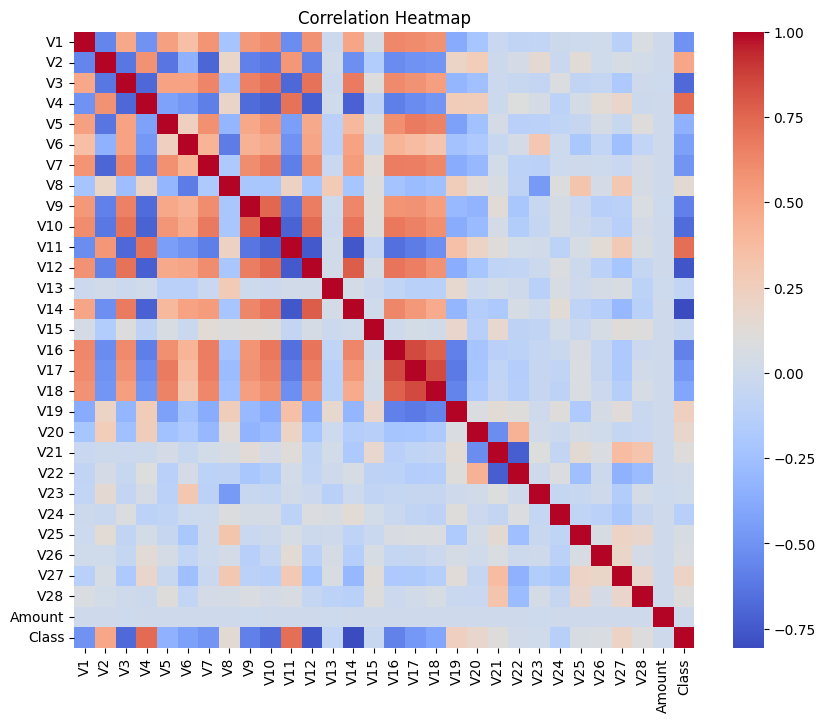

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**From the above figure , we can say there is no any stronger linear relationship between any two variables in the dataset**

**Because of we have only v1-v28 (PCA transformed), amount as independent variables,it's not necessary and relevant to do "Feature selection" and "multicolinearity checking"**

#Data Preprocessing

**Separate Features (X) and Target (y)**

In [22]:
X = df.drop('Class', axis=1) # Features Dataset
y = df['Class']       # Target dataset

**Split into Train and Test Sets**

In [23]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)



In [24]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (454904, 29)
X_test shape: (113726, 29)
y_train shape: (454904,)
y_test shape: (113726,)


**Features Scaling**

In [25]:
from sklearn.preprocessing import RobustScaler

# 1. Create the scaler
scaler = RobustScaler()

# 2. FIT on the training data and TRANSFORM it
# (This learns the rules and applies them)
X_train_scaled = scaler.fit_transform(X_train)

# 3. ONLY TRANSFORM the test data
# (This applies the *same* rules from the training set)
X_test_scaled = scaler.transform(X_test)


print("Data is split and scaled. Ready for training.")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")


Data is split and scaled. Ready for training.
X_train shape: (454904, 29)
X_test shape: (113726, 29)


# Models Training & Evalution

In [26]:
# Import Models to train
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import Metrics from evalution
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [27]:
# Create a dictionary of models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [28]:
# Create a dictionary to store the results
results = {}

# Loop through each model
for name, model in models.items():
    print(f"--- Training {name} ---")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Get predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Get prediction probabilities for AUC
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Store metrics
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": auc
    }

    # Print classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 30 + "\n")

print("--- Model Training Complete ---")

--- Training Logistic Regression ---

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726

------------------------------

--- Training Random Forest ---

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

------------------------------

--- Training XGBoost ---

Classification Report for XGBoost:

              precision    recall  f1-score   support

     

#Comparing the models performance

In [29]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results).T.reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

print("--- Model Comparison Table ---")
print(results_df)

--- Model Comparison Table ---
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.964968   0.977118  0.952236  0.964517  0.993507
1        Random Forest  0.999833   0.999666  1.000000  0.999833  0.999990
2              XGBoost  0.999736   0.999473  1.000000  0.999736  0.999982


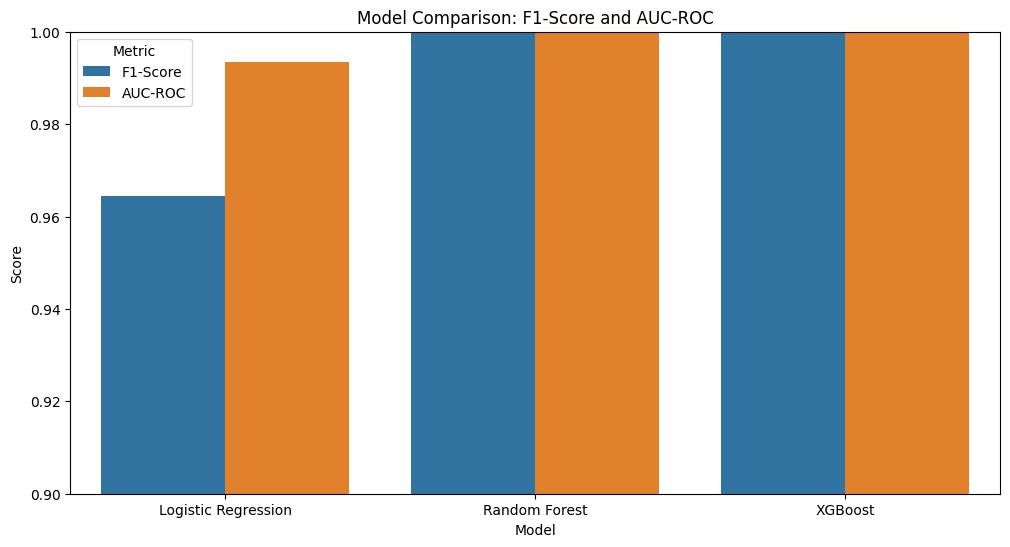

In [30]:
# --- Visualize the results ---

# Melt the DataFrame for easier plotting with seaborn
results_melted = results_df.melt('Model', var_name='Metric', value_name='Score')

# Plot F1-Score and AUC-ROC
plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_melted[results_melted['Metric'].isin(['F1-Score', 'AUC-ROC'])],
    x='Model',
    y='Score',
    hue='Metric'
)
plt.title('Model Comparison: F1-Score and AUC-ROC')
plt.ylim(0.9, 1.0) # Zoom in on the top scores
plt.show()

#Select Best Model & Check Overfitting

In [31]:
# Get the trained Random Forest model from our dictionary
rf_model = models["Random Forest"]

# Get scores on both train and test data
train_score = rf_model.score(X_train_scaled, y_train)
test_score = rf_model.score(X_test_scaled, y_test) # This is just the accuracy

print(f"Random Forest Training Accuracy: {train_score:.4f}")
print(f"Random Forest Test Accuracy:     {test_score:.4f}")

if train_score > test_score + 0.02:
    print("\nWarning: Model appears to be overfitting!")
else:
    print("\nModel performance is consistent. No clear sign of overfitting.")

Random Forest Training Accuracy: 1.0000
Random Forest Test Accuracy:     0.9998

Model performance is consistent. No clear sign of overfitting.


#Hyperparameter Tuning

In [33]:
from xgboost import XGBRFClassifier  # <-- 1. Import the GPU-capable model
from sklearn.model_selection import RandomizedSearchCV

print("--- Starting Hyperparameter Tuning for GPU Random Forest (XGBRF) ---")

# 2. Define a parameter grid for XGBRFClassifier
# Note: The parameter names are different from sklearn's RandomForest.
# 'subsample' and 'colsample_bytree' are key RF parameters.
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'subsample': [0.8, 0.9, 1.0],     # % of samples to use per tree (bagging)
    'colsample_bytree': [0.7, 0.8, 1.0] # % of features to use per tree
}

# 3. Set up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=XGBRFClassifier(
        random_state=42,
        tree_method='gpu_hist',  # <-- 4. This tells it to use the P100 GPU
        eval_metric='logloss',
        use_label_encoder=False
    ),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,  # <-- 5. Keep this! It lets the CPU handle data preparation
    scoring='f1' 
)

# Fit on the scaled training data
# This will now be much, much faster
rf_random_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print(f"\nBest parameters found: {rf_random_search.best_params_}")

--- Starting Hyperparameter Tuning for GPU Random Forest (XGBRF) ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [17:05:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [17:05:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [17:05:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW


Best parameters found: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 20, 'colsample_bytree': 1.0}


In [36]:
from xgboost import XGBRFClassifier  # <-- Make sure this is imported
import joblib
from sklearn.metrics import classification_report

# 1. Get the best parameters (this part is correct)
best_params = rf_random_search.best_params_

# 2. Create the final, optimized model USING XGBRFCLASSIFIER
print("Creating final model with best params:", best_params)
final_model = XGBRFClassifier(
    random_state=42,
    tree_method='gpu_hist',  # <-- Use the GPU for the final train
    eval_metric='logloss',
    use_label_encoder=False,
    **best_params  # <-- This will now work (e.g., 'subsample': 0.8)
)

# 3. Train the final model on ALL the scaled training data
final_model.fit(X_train_scaled, y_train)

print("--- Final Model Trained ---")

# 4. Do a final check on the test set
final_y_pred = final_model.predict(X_test_scaled)
print("\nFinal Model Classification Report on Test Data:\n")
print(classification_report(y_test, final_y_pred))

# 5. Save the final model to a file
model_filename = 'final_fraud_detection_model.joblib'
scaler_filename = 'data_scaler.joblib'

joblib.dump(final_model, model_filename)
joblib.dump(scaler, scaler_filename) # MUST save the scaler too!

print(f"Final model saved to: {model_filename}")
print(f"Scaler saved to: {scaler_filename}")

Creating final model with best params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 20, 'colsample_bytree': 1.0}
--- Final Model Trained ---

Final Model Classification Report on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Final model saved to: final_fraud_detection_model.joblib
Scaler saved to: data_scaler.joblib
[CV] END colsample_bytree=1.0, max_depth=None, n_estimators=100, subsample=0.9; total time=   6.2s
[CV] END colsample_bytree=1.0, max_depth=None, n_estimators=100, subsample=0.9; total time=   5.5s
[CV] END colsample_bytree=1.0, max_depth=None, n_estimators=100, subsample=0.9; total time=   4.2s
[CV] END colsample_bytree=0.7, max_depth=None, n_estimators=100, subsample=0.8; tota